<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

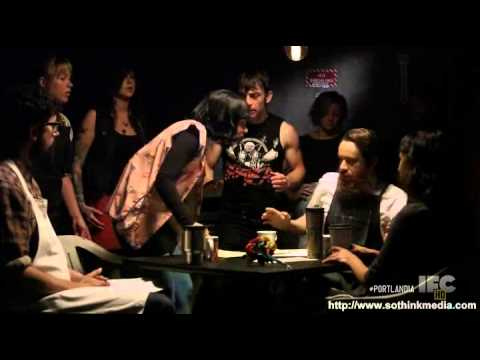

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
from collections import Counter
import re
 
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

In [3]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [4]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [5]:
%pwd

'C:\\Users\\Jake\\DS-Unit-4-Sprint-1-NLP\\module1-text-data'

In [6]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [7]:
shops['star_rating'].unique()

array([' 5.0 star rating ', ' 4.0 star rating ', ' 2.0 star rating ',
       ' 3.0 star rating ', ' 1.0 star rating '], dtype=object)

In [8]:
shops['star_rating'] = shops['star_rating'].str.replace('.0 star rating', '').astype(int)

In [9]:
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4


## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [10]:
STOP_WORDS = nlp.Defaults.stop_words.union([' ','coffee', 'place', "it's", '1', 'check-in', "i'm", "i've", "don't", '-', 'check-ins'])

In [11]:
tokens = []

for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
shops['tokens'] = tokens

In [12]:
shops['tokens']

0       [11/25/2016, love, love, loved, atmosphere!, c...
1       [12/2/2016, listed, date, night:, austin,, amb...
2       [11/30/2016, listed, brunch, spots, loved, ecl...
3       [11/25/2016, cool, decor!, good, drinks, nice,...
4       [12/3/2016, located, northcross, mall, shoppin...
                              ...                        
7611    [2/19/2015, actually, step, restaurant, chance...
7612    [1/21/2016, ok,, steeping, room, awesome., gre...
7613    [4/30/2015, loved, coming, tea,, atmosphere, p...
7614    [8/2/2015, food, average., booths, didn't, fee...
7615    [5/23/2015, finally, stopped, lunch, colleague...
Name: tokens, Length: 7616, dtype: object

In [13]:
wc = count(shops['tokens'])
wc.head(10)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
155,great,2438,3250,1.0,0.008643,0.008643,0.320116
174,like,2034,2902,2.0,0.007718,0.016361,0.267069
166,good,2084,2779,3.0,0.007391,0.023752,0.273634
30,love,1434,1806,4.0,0.004803,0.028555,0.188288
795,little,1230,1479,5.0,0.003933,0.032489,0.161502
175,nice,1188,1368,6.0,0.003638,0.036127,0.155987
466,food,1092,1363,7.0,0.003625,0.039752,0.143382
636,time,1099,1345,8.0,0.003577,0.043329,0.144301
32,pretty,1066,1339,9.0,0.003561,0.046890,0.139968
33,got,980,1247,10.0,0.003316,0.050207,0.128676


In [14]:
good = shops.copy()
#good = good[good['star_rating'] > 3]

In [15]:
tokens = []

for doc in tokenizer.pipe(good['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
good['tokens'] = tokens

In [16]:
good_wc = count(good[(good['star_rating'] > 3)]['tokens'])
good_wc.head(10)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
155,great,2174,2902,1.0,0.009919,0.009919,0.354072
259,good,1643,2180,2.0,0.007452,0.017371,0.267590
229,like,1486,2068,3.0,0.007069,0.024440,0.242020
30,love,1263,1604,4.0,0.005483,0.029922,0.205700
605,little,1027,1230,5.0,0.004204,0.034127,0.167264
231,nice,962,1101,6.0,0.003763,0.037890,0.156678
363,best,951,1093,7.0,0.003736,0.041626,0.154886
177,friendly,986,1014,8.0,0.003466,0.045092,0.160586
51,austin,875,1013,9.0,0.003463,0.048555,0.142508
65,definitely,889,1002,10.0,0.003425,0.051980,0.144788


In [17]:
bad = shops.copy()
#bad = bad[bad['star_rating'] < 4]

In [18]:
tokens = []

for doc in tokenizer.pipe(bad['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
bad['tokens'] = tokens

In [19]:
bad_wc = count(bad[(bad['star_rating'] < 4)]['tokens'])
bad_wc.head(10)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
18,like,548,834,1.0,0.009994,0.009994,0.371274
10,good,441,599,2.0,0.007178,0.017172,0.298780
164,food,266,369,3.0,0.004422,0.021594,0.180217
264,time,264,351,4.0,0.004206,0.025800,0.178862
72,pretty,278,349,5.0,0.004182,0.029982,0.188347
180,great,264,348,6.0,0.004170,0.034153,0.178862
543,people,247,327,7.0,0.003919,0.038071,0.167344
38,service,261,314,8.0,0.003763,0.041834,0.176829
29,got,237,300,9.0,0.003595,0.045429,0.160569
371,ordered,240,296,10.0,0.003547,0.048976,0.162602


## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [20]:
wc_difs = good_wc[['word', 'count']].copy()

In [21]:
wc_difs['good_count'] = wc_difs['count']
wc_difs.drop(['count'], axis=1, inplace=True)

In [22]:
wc_difs = wc_difs.merge(bad_wc[['word', 'count']], on='word', how='outer')
wc_difs['bad_count'] = wc_difs['count']
wc_difs.drop(['count'], axis=1, inplace=True)

In [23]:
wc_difs.head()

,word,good_count,bad_count
0,great,2902.0,348.0
1,good,2180.0,599.0
2,like,2068.0,834.0
3,love,1604.0,202.0
4,little,1230.0,249.0


In [24]:
wc_difs['count_dif'] = wc_difs['good_count'] - wc_difs['bad_count']
wc_difs['count_dif'] = wc_difs['count_dif'].abs()
wc_difs.head()

,word,good_count,bad_count,count_dif
0,great,2902.0,348.0,2554.0
1,good,2180.0,599.0,1581.0
2,like,2068.0,834.0,1234.0
3,love,1604.0,202.0,1402.0
4,little,1230.0,249.0,981.0


In [28]:
wc_difs.sort_values(by = ['count_dif'], ascending=False).head(20)

,word,good_count,bad_count,count_dif
0,great,2902.0,348.0,2554.0
1,good,2180.0,599.0,1581.0
3,love,1604.0,202.0,1402.0
2,like,2068.0,834.0,1234.0
6,best,1093.0,72.0,1021.0
4,little,1230.0,249.0,981.0
7,friendly,1014.0,131.0,883.0
9,definitely,1002.0,152.0,850.0
8,austin,1013.0,175.0,838.0
5,nice,1101.0,267.0,834.0


In [26]:
top20 = wc_difs.sort_values(by = ['count_dif'], ascending=False).head(20)

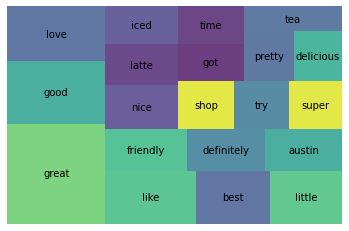

In [27]:
squarify.plot(sizes=top20['count_dif'], label=top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

